In [1]:
import pandas as pd

try:
    df = pd.read_csv('/Users/georgepaul/Desktop/Research-Project/bpd/filtered_office_buildings.csv')
except UnicodeDecodeError:
    df = pd.read_csv('/Users/georgepaul/Desktop/Research-Project/bpd/filtered_office_buildings.csv', encoding='latin1')

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nShape of the DataFrame:")
print(df.shape)

First 5 rows of the DataFrame:


,Unnamed: 0,id,year,zip_code,city,state,climate,building_class,facility_type,floor_area,...,window_glass_type,energy_star_label,energy_star_rating,leed_score,electric_eui,fuel_eui,site_eui,source_eui,ghg_emissions_int,data_source
0,0,1000057501,2014,10004,NEW YORK,NY,4A Mixed - Humid (Baltimore-MD),COMMERCIAL,Office - Uncategorized,1338000.0,...,Reflective,Unknown,72,Unknown,NaN,NaN,132.500000,NaN,No Value,New York City Benchmarking and Audit Ordinances
1,1,1000130005,2012,10004,NEW YORK,NY,4A Mixed - Humid (Baltimore-MD),COMMERCIAL,Office - Uncategorized,411500.0,...,Unknown,Unknown,78,Unknown,NaN,NaN,79.881148,NaN,No Value,New York City Benchmarking and Audit Ordinances
2,2,1000160125,2017,10280,NEW YORK,NY,4A Mixed - Humid (Baltimore-MD),COMMERCIAL,Office - Uncategorized,2577575.0,...,Other Or Combination,Unknown,76,Unknown,NaN,NaN,117.000000,NaN,No Value,New York City Benchmarking and Audit Ordinances
3,9,1000440001,2013,10005,NEW YORK,NY,4A Mixed - Humid (Baltimore-MD),COMMERCIAL,Office - Uncategorized,2239000.0,...,Low-e,Unknown,43,Unknown,NaN,NaN,54.400000,NaN,No Value,New York City Benchmarking and Audit Ordinances
4,10,1000460009,2016,10005,NEW YORK,NY,4A Mixed - Humid (Baltimore-MD),COMMERCIAL,Office - Uncategorized,934205.0,...,Clear,Unknown,50,Unknown,NaN,NaN,117.378415,NaN,No Value,New York City Benchmarking and Audit Ordinances



Shape of the DataFrame:
(8709, 33)


## Data exploration

Explore the dataset, focusing on the site_eui column.

Descriptive statistics for 'site_eui':


count    8205.000000
mean       84.820933
std        46.042635
min         1.117014
25%        60.715608
50%        76.555550
75%        98.066447
max       955.870580
Name: site_eui, dtype: float64

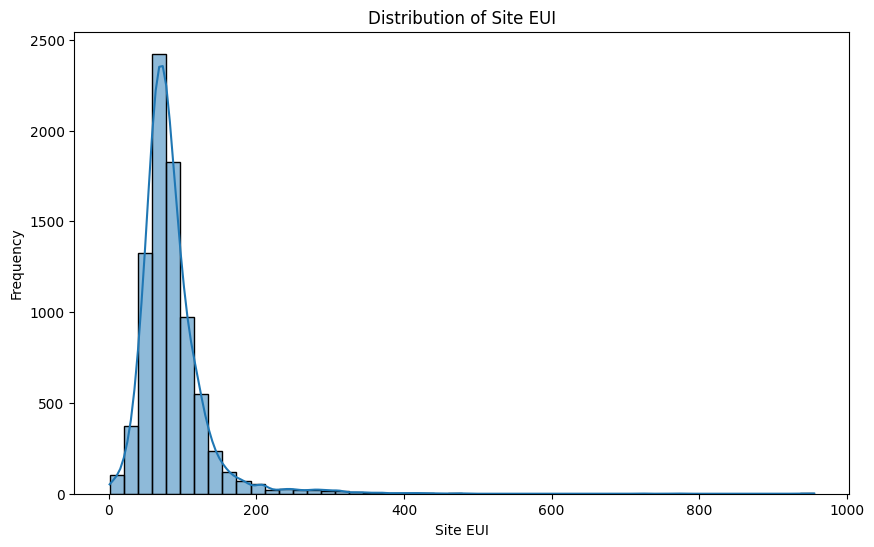

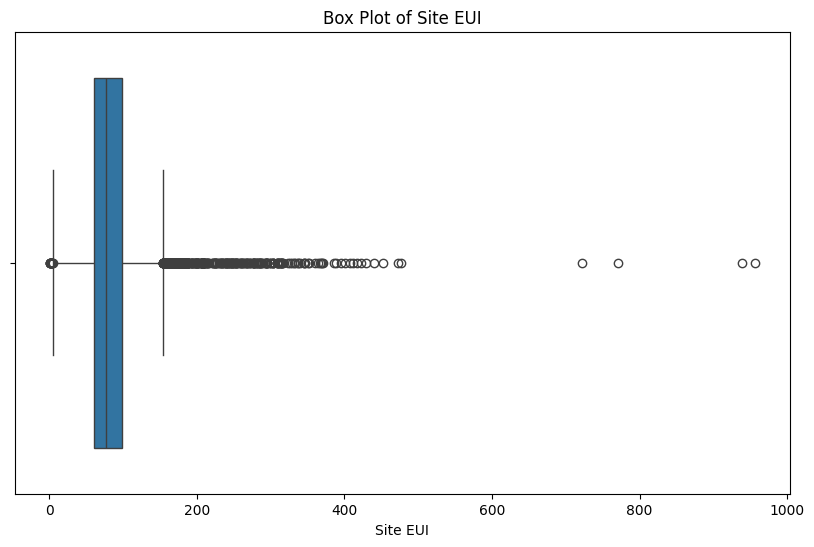

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate and display descriptive statistics
print("Descriptive statistics for 'site_eui':")
display(df['site_eui'].describe())

# 2. Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['site_eui'].dropna(), bins=50, kde=True)
plt.title('Distribution of Site EUI')
plt.xlabel('Site EUI')
plt.ylabel('Frequency')
plt.show()

# 3. Generate a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['site_eui'].dropna())
plt.title('Box Plot of Site EUI')
plt.xlabel('Site EUI')
plt.show()

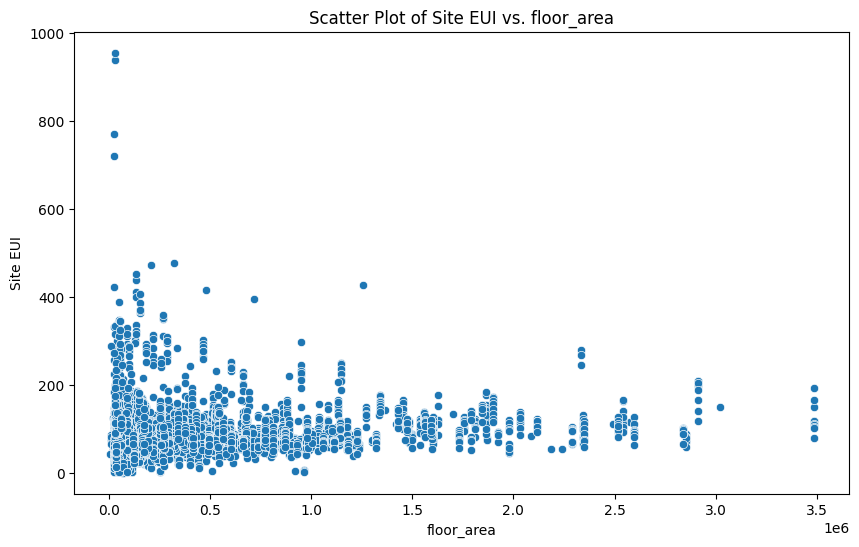

Correlation between 'site_eui' and 'floor_area': 0.15625202060183274


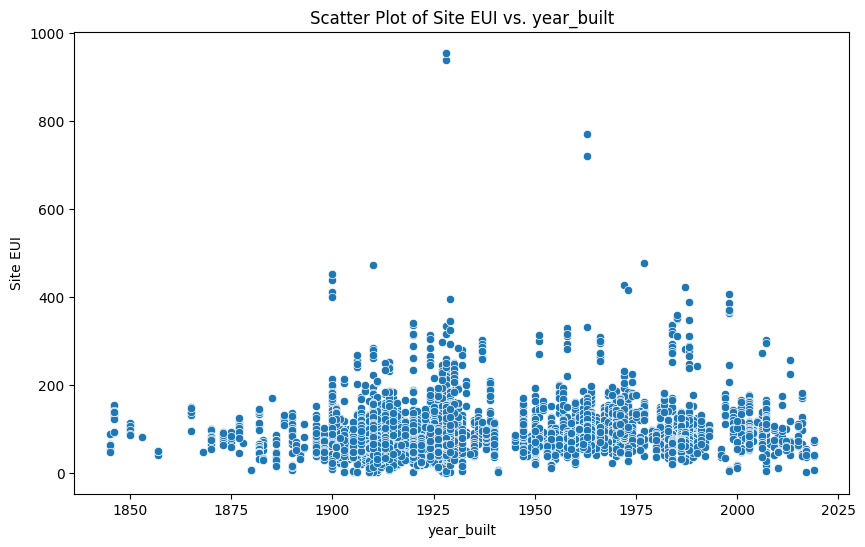

Correlation between 'site_eui' and 'year_built': 0.16926215998076063


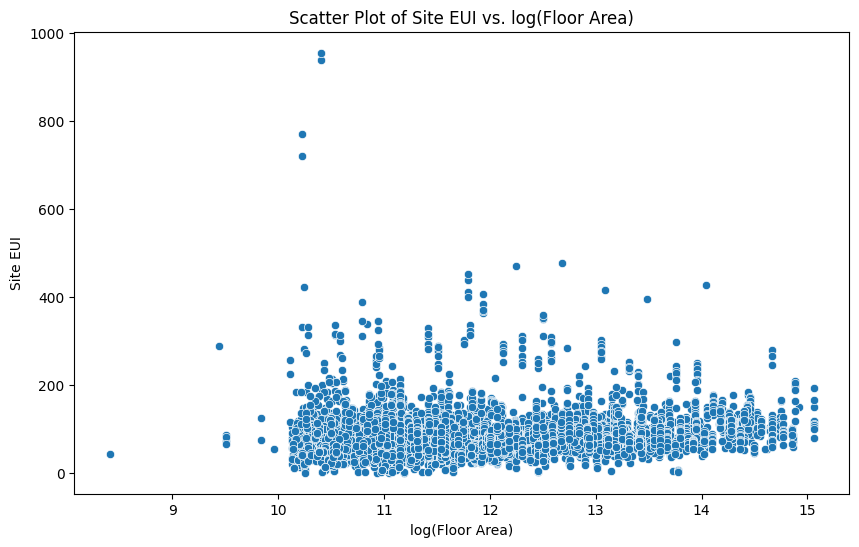

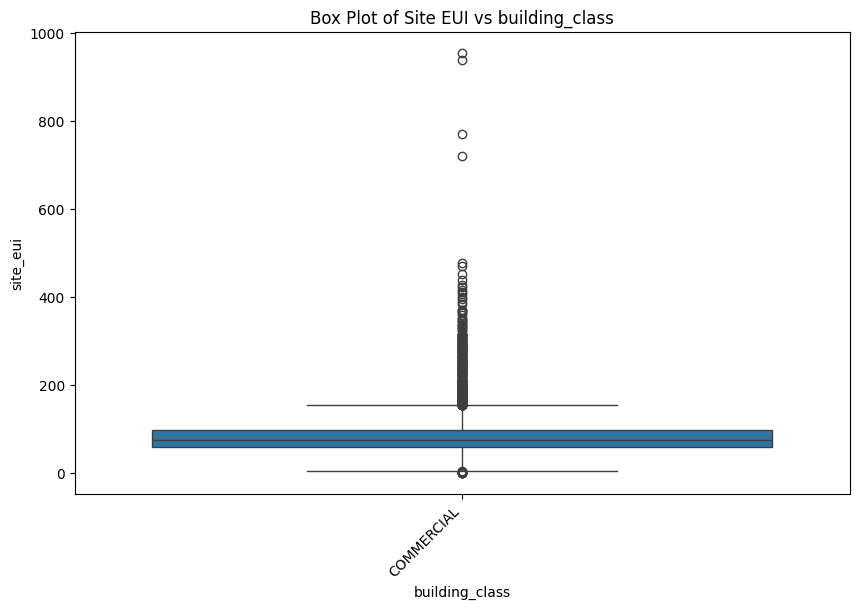

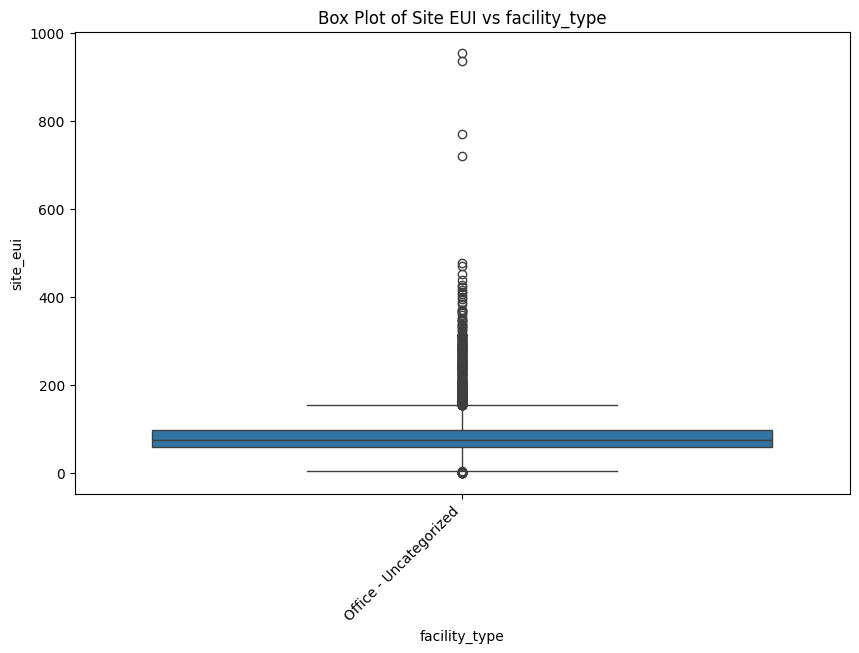

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clean the data
df_cleaned = df[pd.to_numeric(df['year_built'], errors='coerce').notnull()]
df_cleaned = df_cleaned[pd.to_numeric(df_cleaned['site_eui'], errors='coerce').notnull()]
df_cleaned['year_built'] = pd.to_numeric(df_cleaned['year_built'])
df_cleaned['site_eui'] = pd.to_numeric(df_cleaned['site_eui'])


# Explore the relationship between 'site_eui' and numerical features
numerical_features = ['floor_area', 'year_built']
for feature in numerical_features:
    if feature in df_cleaned.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_cleaned, x=feature, y='site_eui')
        plt.title(f'Scatter Plot of Site EUI vs. {feature}')
        plt.xlabel(feature)
        plt.ylabel('Site EUI')
        plt.show()

        # Calculate the correlation
        correlation = df_cleaned[[feature, 'site_eui']].corr().iloc[0, 1]
        print(f"Correlation between 'site_eui' and '{feature}': {correlation}")
    else:
        print(f"Feature '{feature}' not found in the DataFrame.")

# Consider logarithmic transformation if necessary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x=np.log1p(df_cleaned['floor_area']), y='site_eui')
plt.title('Scatter Plot of Site EUI vs. log(Floor Area)')
plt.xlabel('log(Floor Area)')
plt.ylabel('Site EUI')
plt.show()

# Investigate the relationship between 'site_eui' and categorical features
categorical_features = ['building_class', 'facility_type']
for feature in categorical_features:
    if feature in df_cleaned.columns:
      plt.figure(figsize=(10, 6))
      sns.boxplot(x=feature, y='site_eui', data=df_cleaned)
      plt.title(f'Box Plot of Site EUI vs {feature}')
      plt.xticks(rotation=45, ha='right')
      plt.show()

## Data wrangling

Subtask:
Handle missing values and outliers in the dataset.


Missing values in each column:
 Unnamed: 0                    0
id                            0
year                          0
zip_code                      0
city                          0
state                         0
climate                       0
building_class                0
facility_type                 0
floor_area                    0
year_built                    0
number_of_people              0
occupant_density              0
operating_hours               0
lighting                      0
air_flow_control              0
heating                       0
heating_fuel                  0
cooling                       0
wall_type                     0
wall_insulation_r_value       0
roof_ceiling                  0
window_glass_layers           0
window_glass_type             0
energy_star_label             0
energy_star_rating            0
leed_score                    0
electric_eui                269
fuel_eui                   1305
site_eui                      0
source_e

/var/folders/7x/hltjgwdn7sjbwj_qq820fkkw0000gn/T/ipykernel_19521/3546608254.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_value, inplace=True)
/var/folders/7x/hltjgwdn7sjbwj_qq820fkkw0000gn/T/ipykernel_19521/3546608254.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

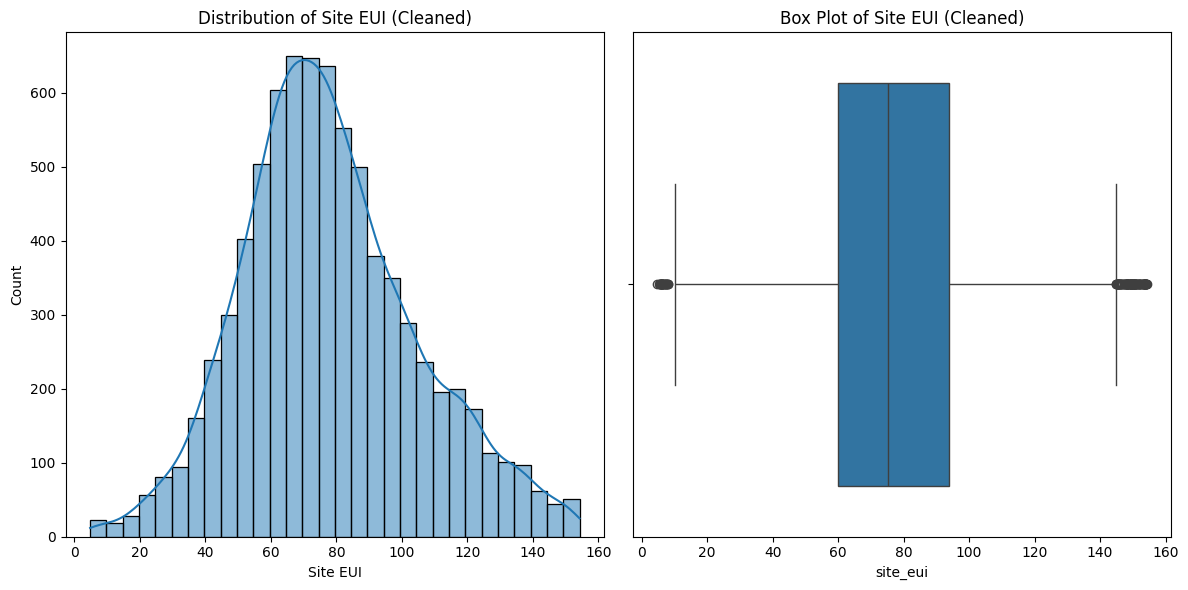

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify columns with missing values
missing_values = df_cleaned.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Impute missing values in numerical features using median
numerical_cols_with_missing_values = ['electric_eui', 'fuel_eui', 'source_eui']
for col in numerical_cols_with_missing_values:
    if col in df_cleaned.columns:
        median_value = df_cleaned[col].median()
        df_cleaned[col].fillna(median_value, inplace=True)

# Handle outliers in 'site_eui' using IQR
Q1 = df_cleaned['site_eui'].quantile(0.25)
Q3 = df_cleaned['site_eui'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[df_cleaned['site_eui'].between(lower_bound, upper_bound)]

# Verify data quality after cleaning
missing_values_after_cleaning = df_cleaned.isnull().sum()
print("\nMissing values after cleaning:\n", missing_values_after_cleaning)

# Summary statistics
original_stats = df['site_eui'].describe()
cleaned_stats = df_cleaned['site_eui'].describe()
print("\nOriginal Summary Statistics:\n", original_stats)
print("\nCleaned Summary Statistics:\n", cleaned_stats)


# Visualize the cleaned 'site_eui'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['site_eui'], bins=30, kde=True)
plt.title('Distribution of Site EUI (Cleaned)')
plt.xlabel('Site EUI')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['site_eui'])
plt.title('Box Plot of Site EUI (Cleaned)')
plt.tight_layout()
plt.show()

### Data visualisation

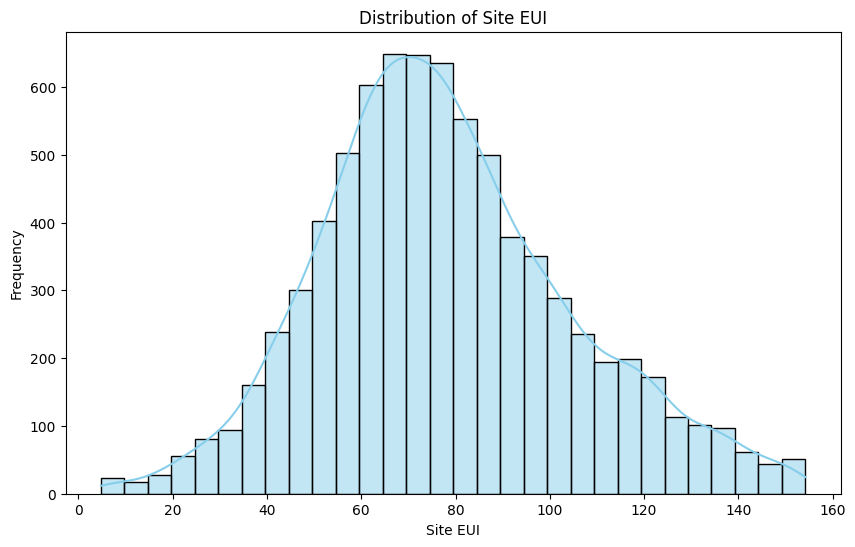

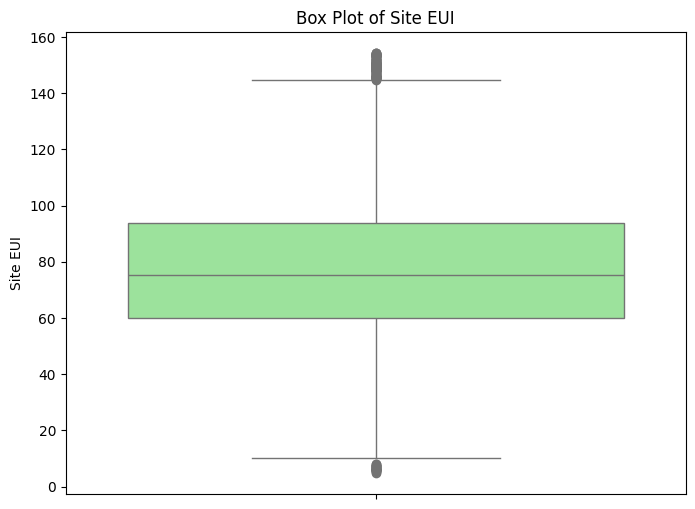

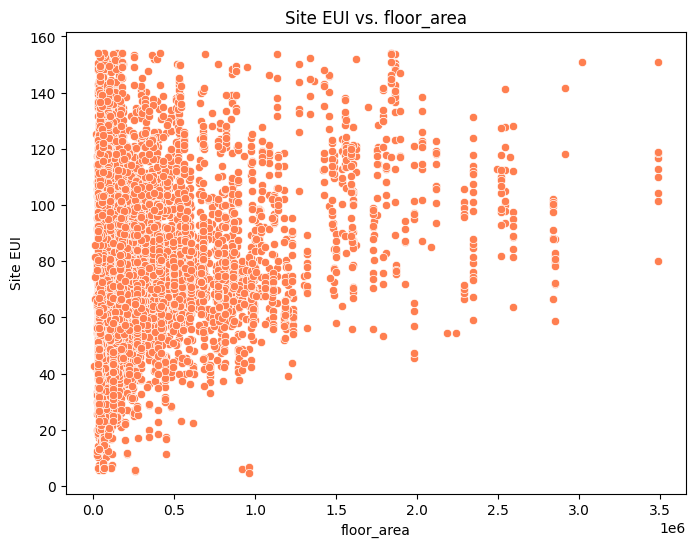

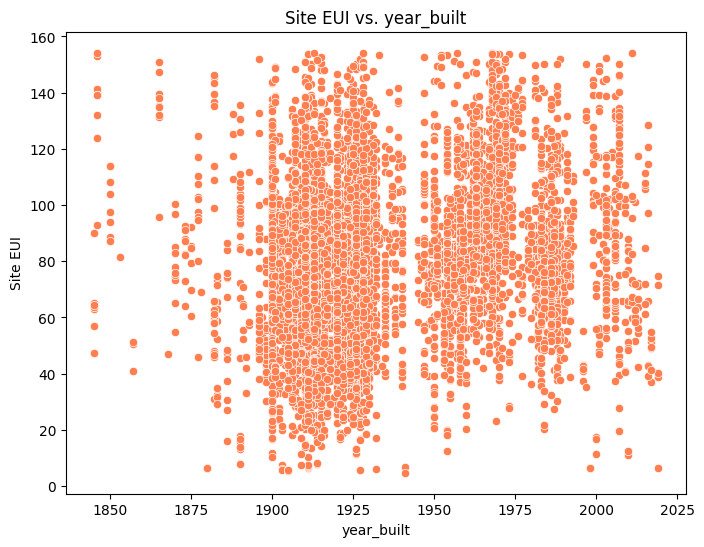

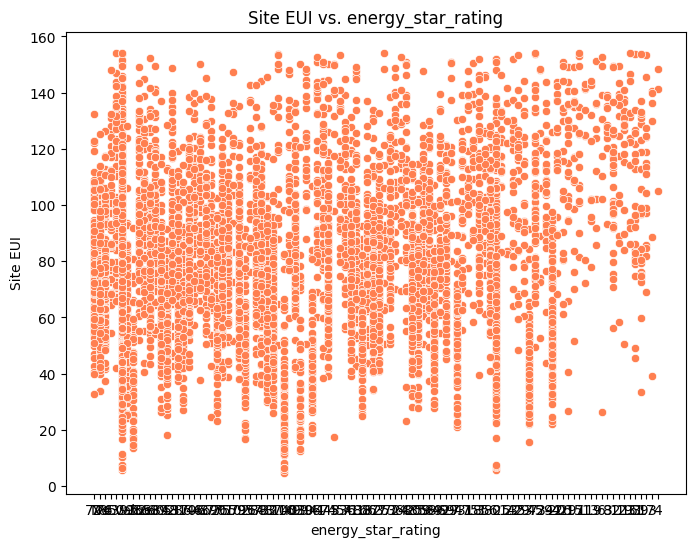

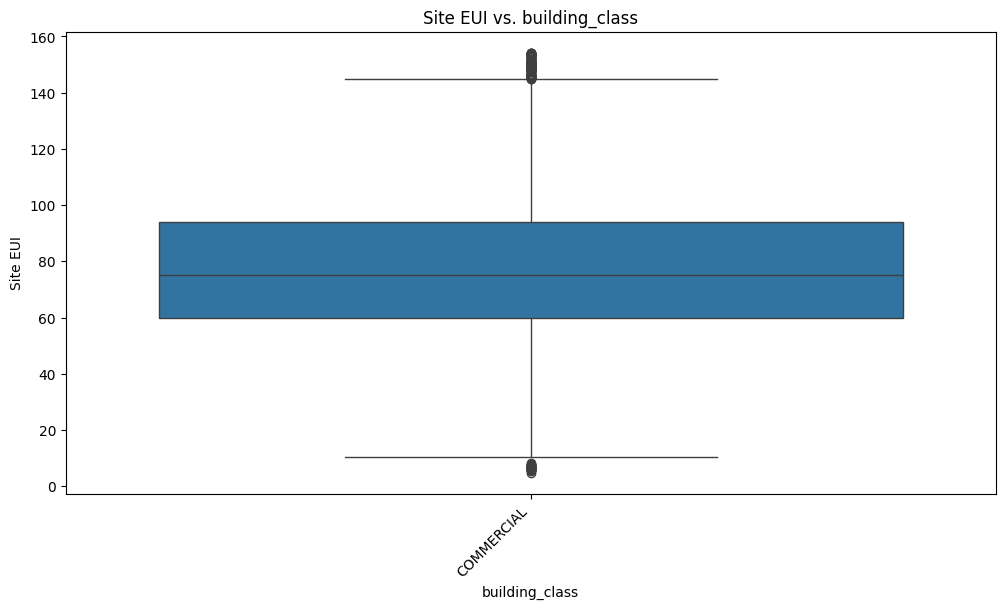

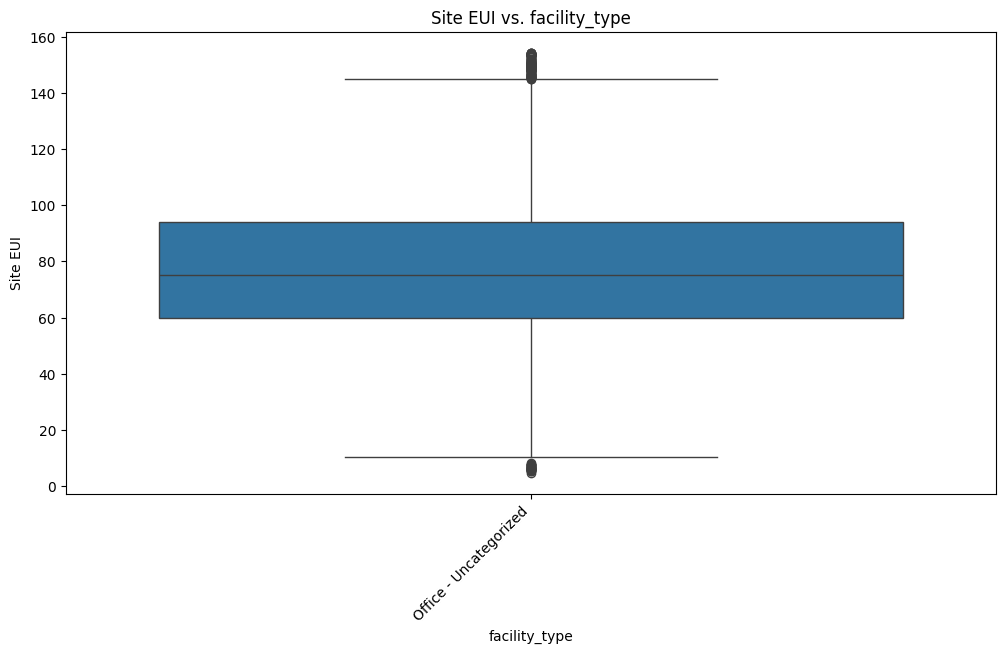

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of site_eui with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['site_eui'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Site EUI')
plt.xlabel('Site EUI')
plt.ylabel('Frequency')
plt.show()

# 2. Box plot of site_eui
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned['site_eui'], color='lightgreen')
plt.title('Box Plot of Site EUI')
plt.ylabel('Site EUI')
plt.show()

# 3. Scatter plots
numerical_features = ['floor_area', 'year_built', 'energy_star_rating']
for feature in numerical_features:
    if feature in df_cleaned.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df_cleaned[feature], y=df_cleaned['site_eui'], color='coral')
        plt.title(f'Site EUI vs. {feature}')
        plt.xlabel(feature)
        plt.ylabel('Site EUI')
        plt.show()

# 4. Box plots for categorical features
categorical_features = ['building_class', 'facility_type']
for feature in categorical_features:
    if feature in df_cleaned.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=feature, y='site_eui', data=df_cleaned) # Removed palette argument
        plt.title(f'Site EUI vs. {feature}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Site EUI')
        plt.show()

In [9]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
display(df_cleaned.describe())

# Information about the DataFrame (data types, non-null values)
print("\nDataFrame Information:")
df_cleaned.info()

# Value counts for categorical columns (replace 'categorical_column_name' with actual column names)
categorical_features = ['building_class', 'facility_type'] # Example categorical columns, adjust as needed
for feature in categorical_features:
    if feature in df_cleaned.columns:
        print(f"\nValue Counts for '{feature}':")
        print(df_cleaned[feature].value_counts())
    else:
        print(f"Feature '{feature}' not found in the DataFrame.")

Summary Statistics for Numerical Columns:


,Unnamed: 0,year,floor_area,year_built,electric_eui,fuel_eui,site_eui,source_eui
count,7777.000000,7777.000000,7.777000e+03,7777.000000,7777.000000,7777.000000,7777.000000,7777.000000
mean,16412.268870,2015.685740,3.318158e+05,1933.593031,47.156921,31.219471,77.887073,181.333371
std,9560.370637,3.129779,4.484713e+05,29.759969,18.783413,16.962743,26.786602,63.633394
min,0.000000,2010.000000,4.483000e+03,1845.000000,0.000000,0.000000,4.779624,8.542663
25%,10516.000000,2013.000000,7.861600e+04,1912.000000,34.978231,20.971600,59.926772,138.587095
50%,14957.000000,2016.000000,1.516950e+05,1926.000000,46.382912,29.579471,75.142376,177.679943
75%,26369.000000,2018.000000,3.820680e+05,1957.000000,57.533188,38.770455,93.853389,218.644510
max,49622.000000,2020.000000,3.486407e+06,2019.000000,147.649728,139.618612,154.213228,463.620145



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 8705
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               7777 non-null   int64  
 1   id                       7777 non-null   object 
 2   year                     7777 non-null   int64  
 3   zip_code                 7777 non-null   object 
 4   city                     7777 non-null   object 
 5   state                    7777 non-null   object 
 6   climate                  7777 non-null   object 
 7   building_class           7777 non-null   object 
 8   facility_type            7777 non-null   object 
 9   floor_area               7777 non-null   float64
 10  year_built               7777 non-null   int64  
 11  number_of_people         7777 non-null   object 
 12  occupant_density         7777 non-null   object 
 13  operating_hours          7777 non-null   object 
 14  light

Categorical Features: ['id', 'zip_code', 'city', 'state', 'climate', 'building_class', 'facility_type', 'number_of_people', 'occupant_density', 'operating_hours', 'lighting', 'air_flow_control', 'heating', 'heating_fuel', 'cooling', 'wall_type', 'wall_insulation_r_value', 'roof_ceiling', 'window_glass_layers', 'window_glass_type', 'energy_star_label', 'energy_star_rating', 'leed_score', 'ghg_emissions_int', 'data_source']
Numerical Features: ['Unnamed: 0', 'year', 'floor_area', 'year_built', 'electric_eui', 'fuel_eui', 'site_eui', 'source_eui']


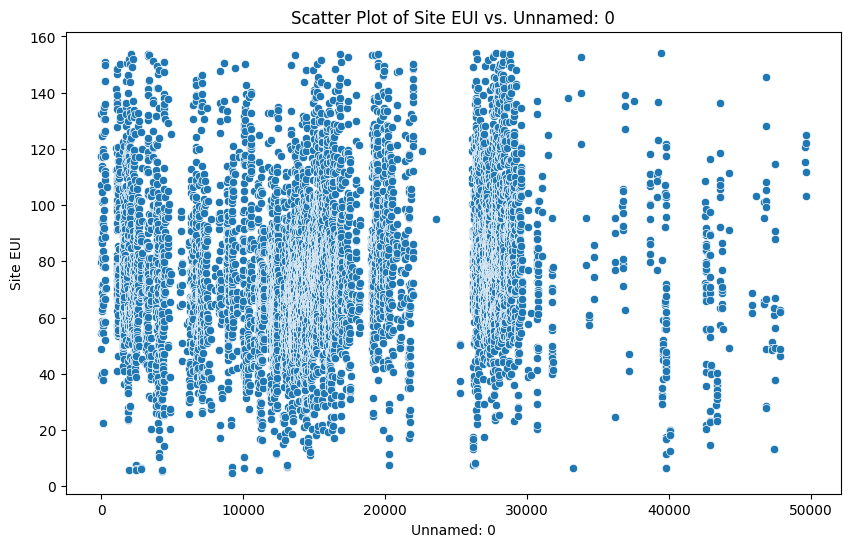

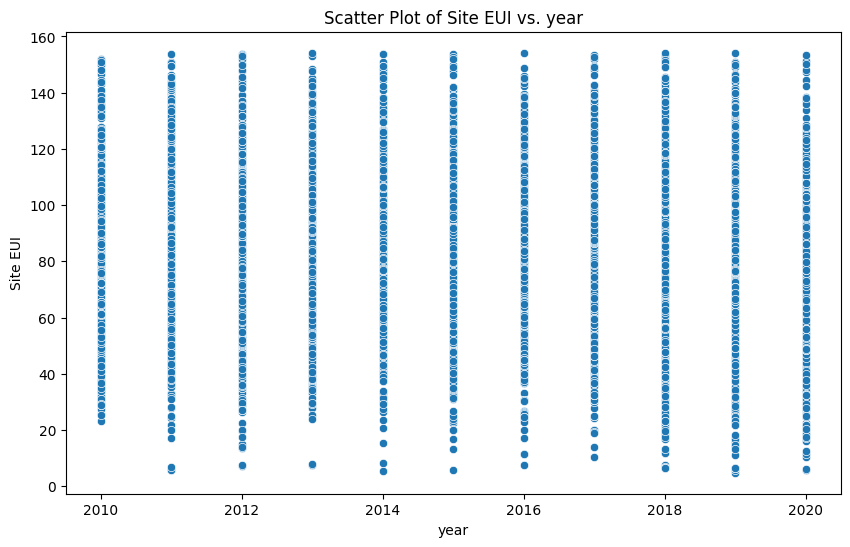

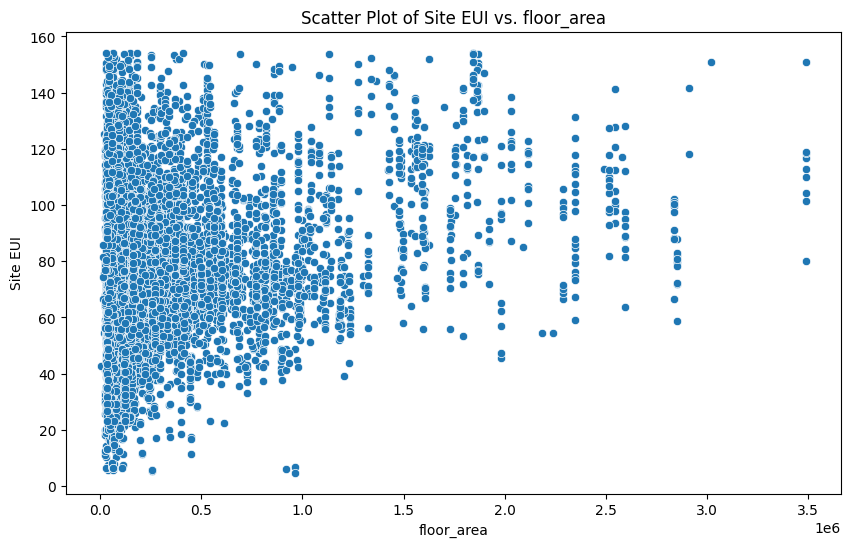

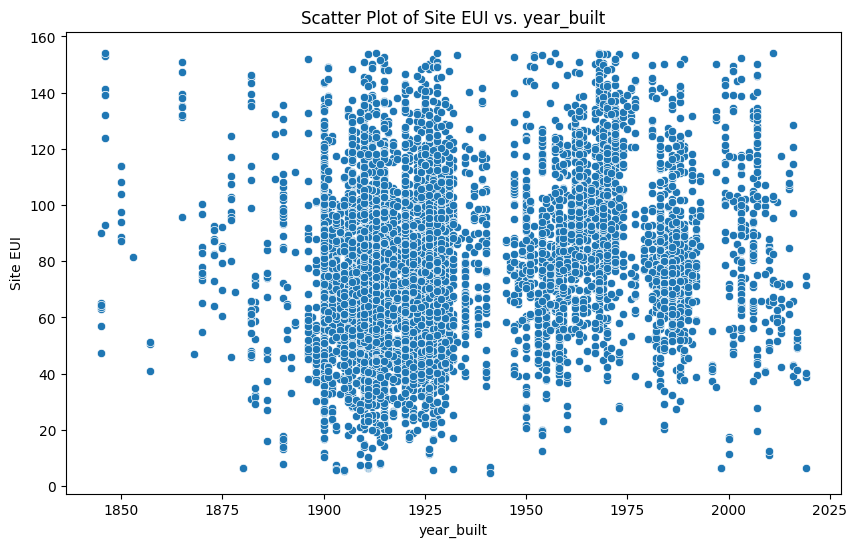

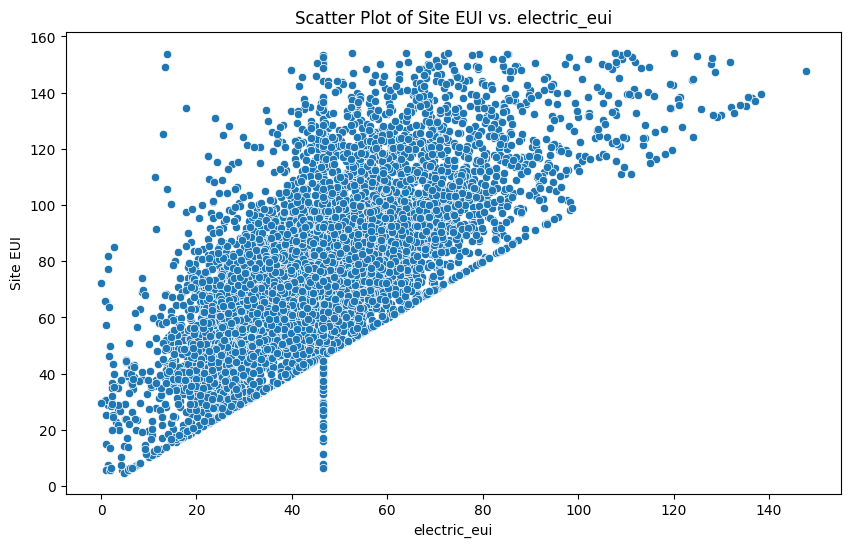

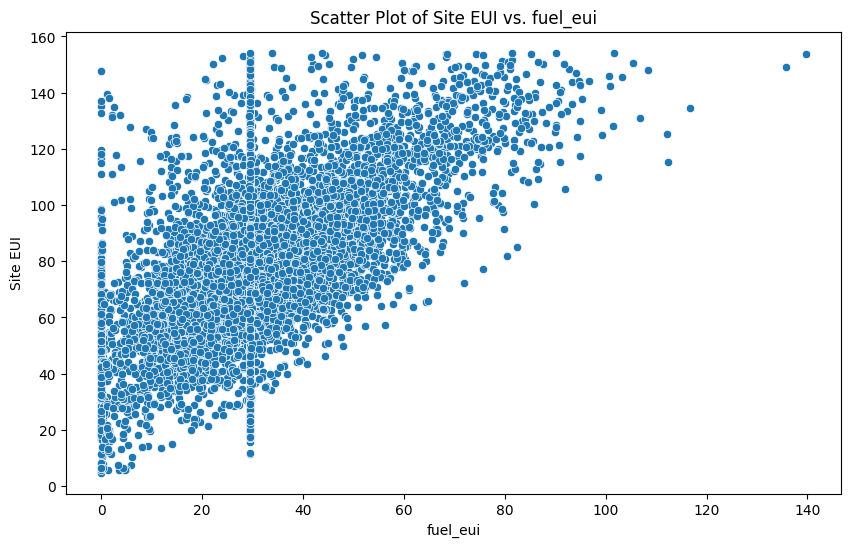

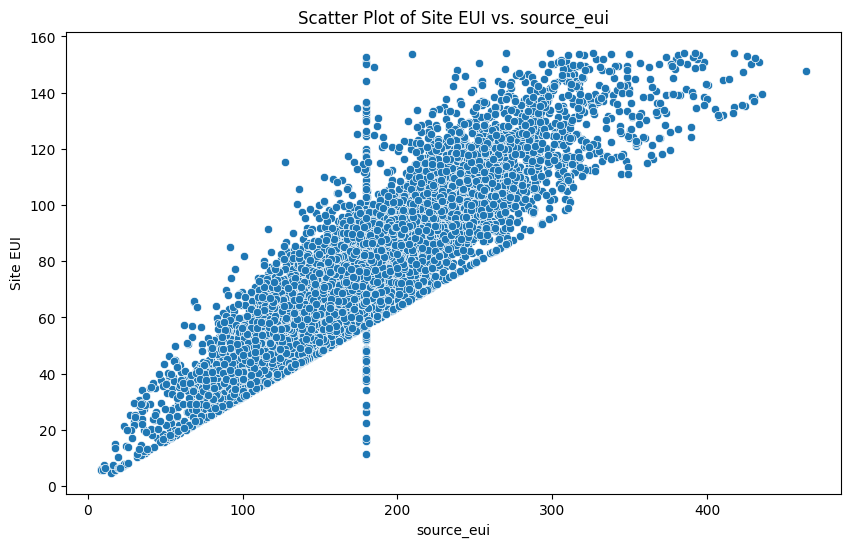

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is your DataFrame

# Identify categorical and numerical columns
categorical_features = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

# Create scatter plots for numerical features against 'site_eui'
if 'site_eui' in numerical_features:
    numerical_features.remove('site_eui') # Remove site_eui from the list of features to plot against itself

    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_cleaned, x=feature, y='site_eui')
        plt.title(f'Scatter Plot of Site EUI vs. {feature}')
        plt.xlabel(feature)
        plt.ylabel('Site EUI')
        plt.show()
else:
    print("'site_eui' not found in numerical features.")

In [11]:
missing_values = df_cleaned.isnull().sum()

print("Missing values in each column:\n")
print(missing_values)

Missing values in each column:

Unnamed: 0                 0
id                         0
year                       0
zip_code                   0
city                       0
state                      0
climate                    0
building_class             0
facility_type              0
floor_area                 0
year_built                 0
number_of_people           0
occupant_density           0
operating_hours            0
lighting                   0
air_flow_control           0
heating                    0
heating_fuel               0
cooling                    0
wall_type                  0
wall_insulation_r_value    0
roof_ceiling               0
window_glass_layers        0
window_glass_type          0
energy_star_label          0
energy_star_rating         0
leed_score                 0
electric_eui               0
fuel_eui                   0
site_eui                   0
source_eui                 0
ghg_emissions_int          0
data_source                0
dtype: int6

In [12]:
print(df_cleaned.head())

   Unnamed: 0          id  year zip_code      city state  \
0           0  1000057501  2014    10004  NEW YORK    NY   
1           1  1000130005  2012    10004  NEW YORK    NY   
2           2  1000160125  2017    10280  NEW YORK    NY   
3           9  1000440001  2013    10005  NEW YORK    NY   
4          10  1000460009  2016    10005  NEW YORK    NY   

                           climate building_class           facility_type  \
0  4A Mixed - Humid (Baltimore-MD)     COMMERCIAL  Office - Uncategorized   
1  4A Mixed - Humid (Baltimore-MD)     COMMERCIAL  Office - Uncategorized   
2  4A Mixed - Humid (Baltimore-MD)     COMMERCIAL  Office - Uncategorized   
3  4A Mixed - Humid (Baltimore-MD)     COMMERCIAL  Office - Uncategorized   
4  4A Mixed - Humid (Baltimore-MD)     COMMERCIAL  Office - Uncategorized   

   floor_area  ...     window_glass_type energy_star_label energy_star_rating  \
0   1338000.0  ...            Reflective           Unknown                 72   
1    411500.0 

In [13]:
df_cleaned.to_csv('/Users/georgepaul/Desktop/Research-Project/bpd/cleaned_office_buildings.csv', index=False)

print("Cleaned DataFrame saved to 'cleaned_office_buildings.csv'")

Cleaned DataFrame saved to 'cleaned_office_buildings.csv'
